# The Full, Running Example for the Defense

Change up to the main repo directory:

In [1]:
import os
os.chdir(os.path.join('..', '..'))

In [2]:
%load_ext autoreload
%autoreload 2
import gym
from IPython.display import Video
from sklearn.model_selection import train_test_split

from wombats.systems import (StaticMinigridTSWrapper,
                             LavaComparison_noDryingOff)
from wombats.automaton import active_automata
from wombats.automaton import MinigridTransitionSystem
from wombats.learning import FlexfringeInterface
from wombats.automaton import Automaton
from wombats.utils import get_experiment_paths

# setting all paths
EXPERIMENT_NAME = 'simple_running_example'
ENV_ID = 'MiniGrid-MyDistShift-v0'

path_data = get_experiment_paths(EXPERIMENT_NAME)
EXPERIMENT_DIR = path_data['EXPERIMENT_DIR']
PDFA_MODEL_CONFIG_FILE = path_data['PDFA_MODEL_CONFIG_FILE']
LEARNER_DATA_DIR = path_data['LEARNER_DATA_DIR']
LEARNING_TRAIN_DATA_REL_FILEPATH = path_data['LEARNING_TRAIN_DATA_REL_FILEPATH']
LEARNING_TEST_DATA_REL_FILEPATH = path_data['LEARNING_TEST_DATA_REL_FILEPATH']
GYM_MONITOR_LOG_DIR = path_data['GYM_MONITOR_LOG_DIR']

# reset the kernel's Automata class' experimental directory for all created
# Automaton objects.
#
# If you autoreload any code having to do with the automaton, then you will
# need to re-run this cell to get the right automaton data path back, as the
# reload will reset the base Automaton class' automata_data_dir property
Automaton.automata_data_dir = os.path.join(EXPERIMENT_DIR)

## Loading in the Specification

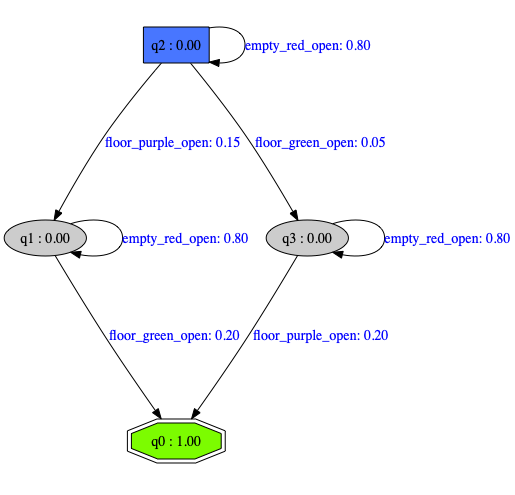

In [3]:
pdfa_specification = active_automata.get(automaton_type='PDFA',
                                         graph_data=PDFA_MODEL_CONFIG_FILE)

pdfa_specification.draw('_'.join([EXPERIMENT_NAME, ENV_ID, 'PDFA']))

In [46]:
num_samples = 1000
max_trace_length = 20
(traces,
 trace_lengths,
 trace_probs) = pdfa_specification.generate_traces(num_samples, N=max_trace_length)

# create a training-test split for model validation after training 
test_size = 0.99
(traces_train, traces_test,
 traceLengths_train, traceLengths_test,
 trace_probs_train, trace_probs_test) = train_test_split(traces,
                                                         trace_lengths,
                                                         trace_probs,
                                                         test_size=test_size)

# Write learning data to files for inference
train_data_file = pdfa_specification.write_traces_to_file(
    traces_train,
    file=LEARNING_TRAIN_DATA_REL_FILEPATH)
test_data_file = pdfa_specification.write_traces_to_file(
    traces_test,
    file=LEARNING_TEST_DATA_REL_FILEPATH)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done   3 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done   6 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done   7 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done  11 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done  12 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done  13 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=16)]: Done 212 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 216 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 220 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 224 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 228 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 232 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 236 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 240 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 244 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 248 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 252 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 260 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 264 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 268 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 272 tasks      | elapsed:    3.5s
[Paralle

[Parallel(n_jobs=16)]: Done 873 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 874 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 875 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 876 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 877 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 878 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 879 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 880 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 881 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 882 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 883 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 884 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 885 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 886 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 887 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 888 tasks      | elapsed:    4.1s
[Paralle

In [23]:
flexfringe = FlexfringeInterface(output_directory=LEARNER_DATA_DIR)

welcome, running git commit d1cf04ada0831d0605a3651971ef9a02091d8823 with: dfasat/flexfringe -h=kldistance -d=kl_data -m=2 -n=2 -x=0 -w=0 -a=0 -b=0 -f=0 -I=1 -t=1 -q=0 -y=0 -p=0.4 --output-dir=experiments/simple_running_example/flexfringe_data/dfa /Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/experiments/simple_running_example/flexfringe_data/simple_running_example_train 
sat_program : 
valid: kldistance
aic 1
alergia 1
alergia94 1
conflict_driven 1
conflict_edsm_driven 1
conflict_overlap_driven 1
count_driven 1
depth_driven 1
evidence_driven 1
fixed_depth_mse_error 1
full_overlap_driven 1
kldistance 1
likelihoodratio 1
mealy 1
mse_error 1
overlap4logs 1
overlap_driven 1
process_mining 1
Using heuristic kldistance
Creating apta using evaluation class kl_data
batch mode selected
reading data finished, processing:
dfasat running m99983  x14  m99983  x7  x6  m99974  x3  

found intermediate solution with 5 an

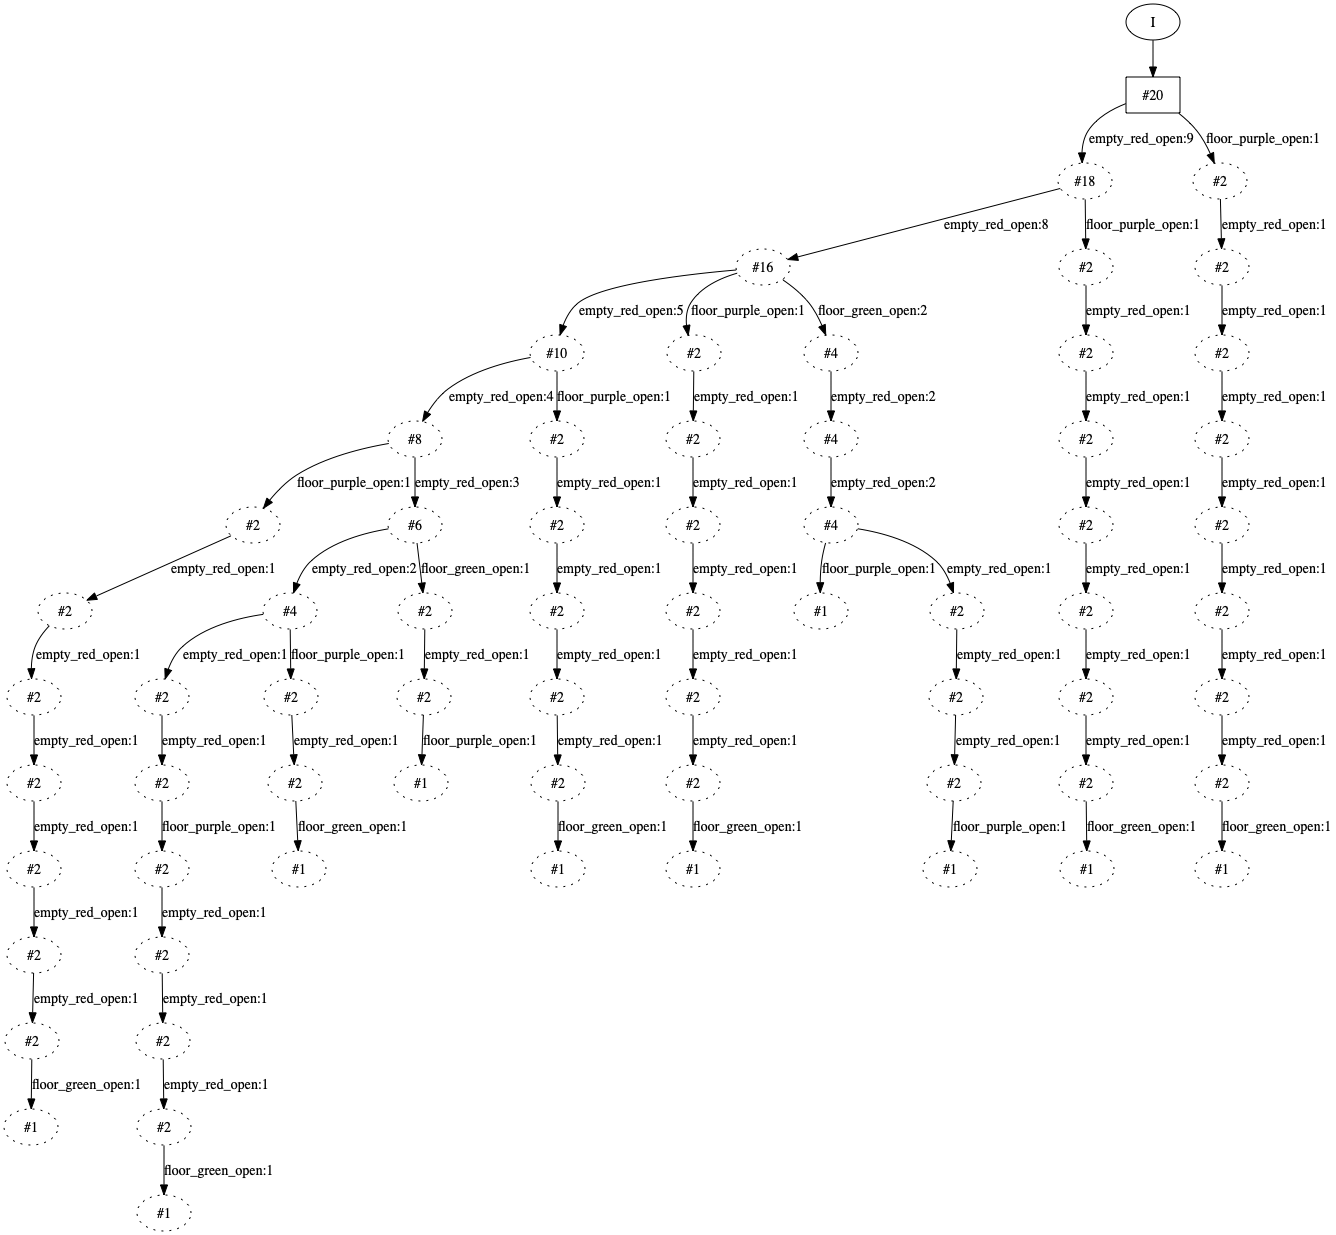

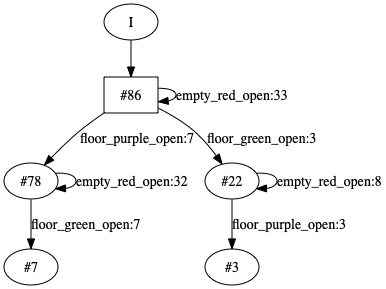

In [32]:
data = flexfringe.infer_model(training_file=train_data_file,
                              h='kldistance',
                              d='kl_data',
                              m='2',
                              n='2',
                              x='0',
                              w='0',
                              a='0',
                              b='0',
                              f='0',
                              I='1',
                              t='1',
                              q='0',
                              y='0',
                              p='0.4')
flexfringe.draw_initial_model()
flexfringe.draw_learned_model()

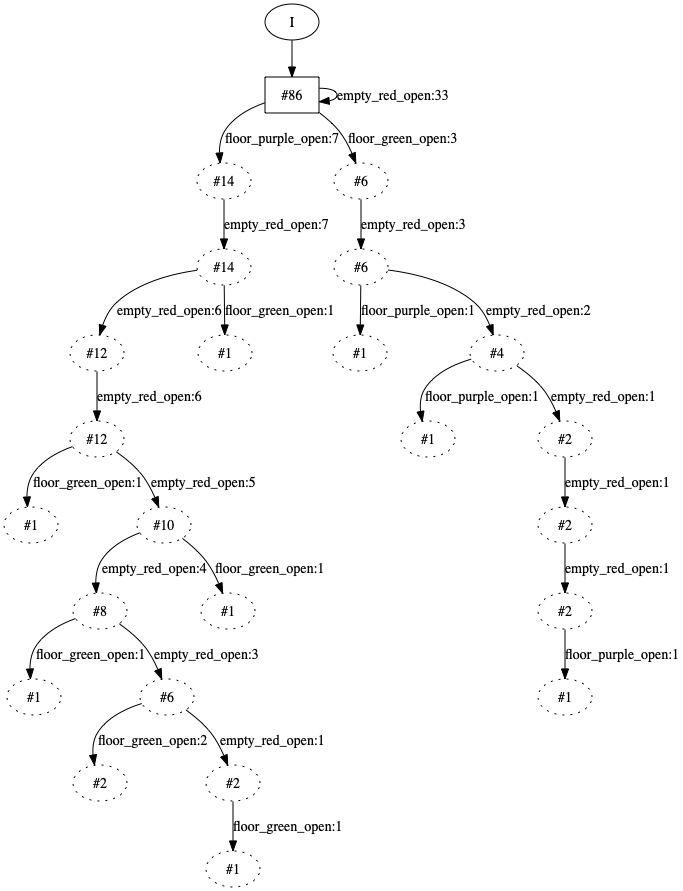

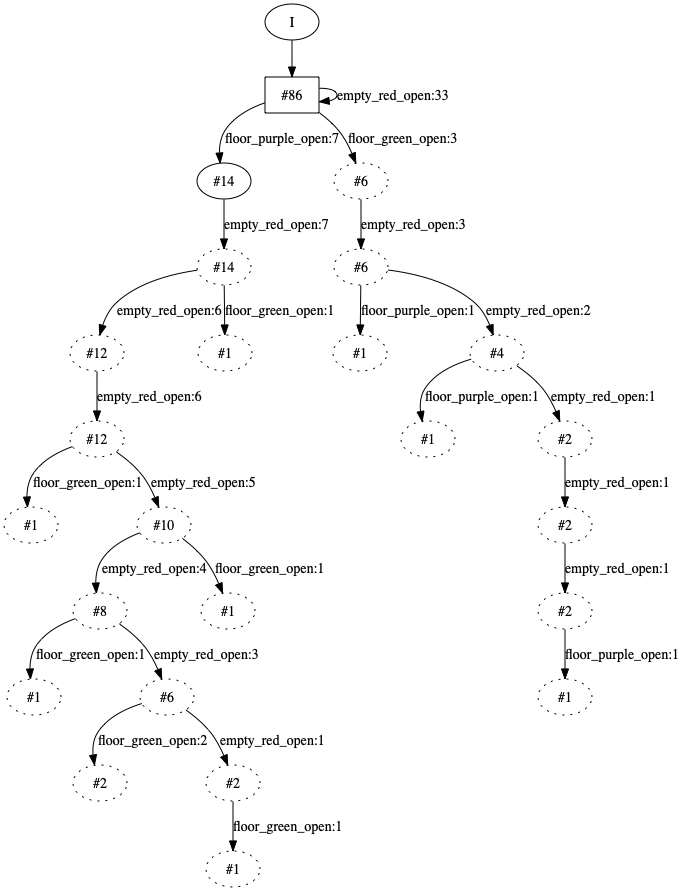

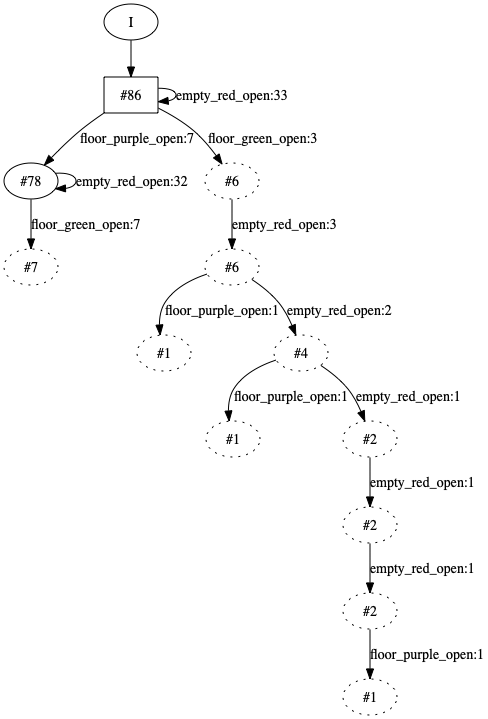

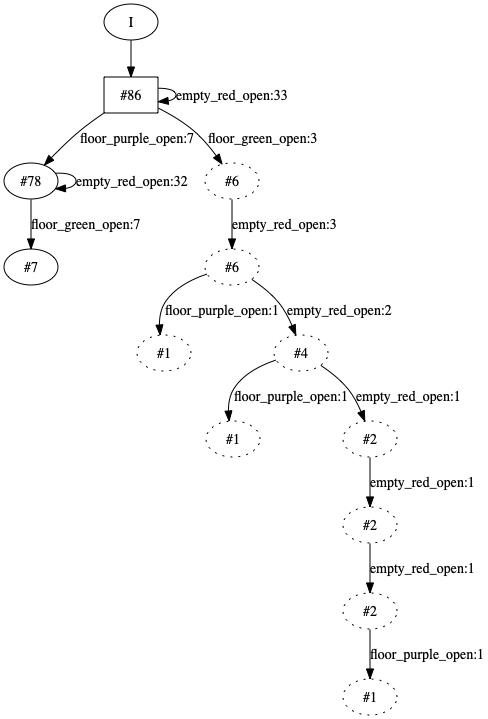

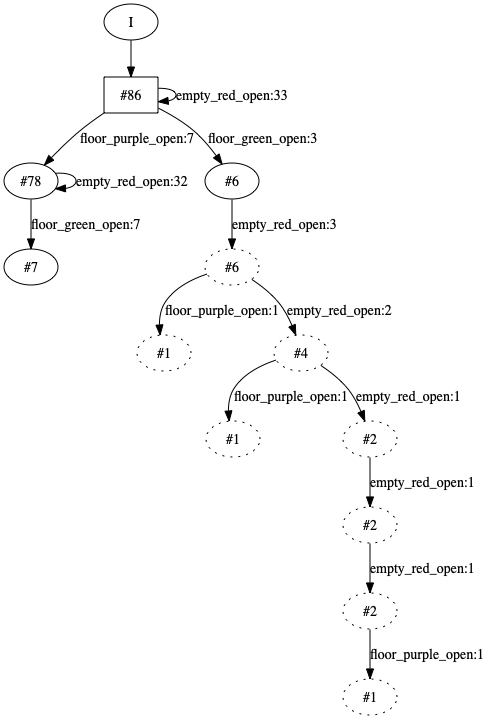

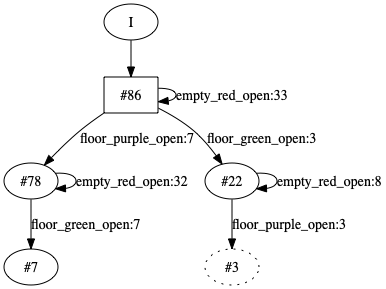

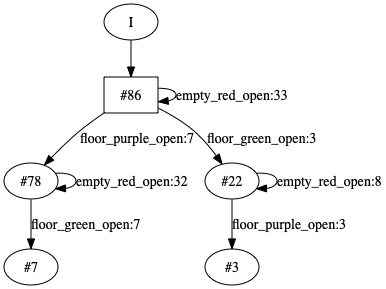

In [33]:
# flexfringe.draw_IPython(flexfringe._read_model_data('meowmix_2.dot'))
# flexfringe.draw_IPython(flexfringe._read_model_data('meowmix_3.dot'))
# flexfringe.draw_IPython(flexfringe._read_model_data('meowmix_4.dot'))
# flexfringe.draw_IPython(flexfringe._read_model_data('meowmix_5.dot'))
# flexfringe.draw_IPython(flexfringe._read_model_data('meowmix_6.dot'))
# flexfringe.draw_IPython(flexfringe._read_model_data('meowmix_7.dot'))
# flexfringe.draw_IPython(flexfringe._read_model_data('meowmix_8.dot'))

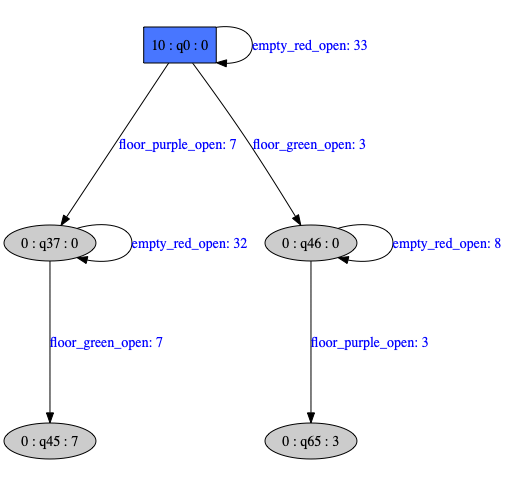

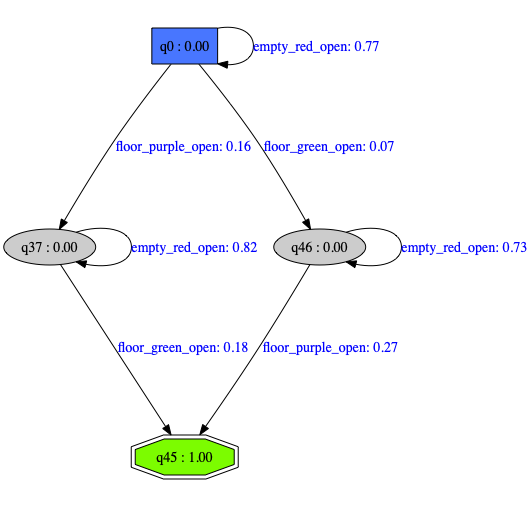

In [34]:
learned_fdfa = active_automata.get(automaton_type='FDFA',
                                   graph_data=flexfringe,
                                   graph_data_format='learning_interface')
learned_fdfa.draw('_'.join([EXPERIMENT_NAME, ENV_ID, 'learned', 'FDFA']))

learned_pdfa = active_automata.get(automaton_type='PDFA',
                                   graph_data=learned_fdfa,
                                   graph_data_format='fdfa_object',
                                   merge_sinks=True)
learned_pdfa.draw('_'.join([EXPERIMENT_NAME, ENV_ID, 'learned', 'PDFA']))

In [47]:
(specification_MPS,
 specification_MPS_prob, _) = pdfa_specification.most_probable_string()
print(f'Specification MPS: {specification_MPS}')
print(f'Probability of Spec. MPS in PDFA"s Language: {specification_MPS_prob}')

learned_model_MPS, learned_model_MPS_prob, _ = learned_pdfa.most_probable_string()
print(f'Learned MPS: {learned_model_MPS}')
print(f'Probability of Learned MPS in PDFA"s Language: {learned_model_MPS_prob}')


Specification MPS: ['floor_purple_open', 'floor_green_open']
Probability of Spec. MPS in PDFA"s Language: 0.03



Learned MPS: ['floor_purple_open', 'floor_green_open']
Probability of Learned MPS in PDFA"s Language: 0.029218843172331546


In [48]:
test_perplexity = learned_pdfa.perplexity(traces_test, trace_probs_test)
train_perplexity = learned_pdfa.perplexity(traces_train, trace_probs_train)
target_perplexity = pdfa_specification.perplexity(traces_test, trace_probs_test)

print(f"Test Perplexity of Learned Model: {test_perplexity}")
print(f"Training Perplexity of Learned Model: {train_perplexity}")
print(f"Perplexity of Target Model: {target_perplexity}")

Test Perplexity of Learned Model: 1.0381658107623024
Training Perplexity of Learned Model: 1.0387401535873397
Perplexity of Target Model: 1.0381283491468045


In [49]:
print(learned_pdfa.predictive_accuracy(test_traces=traces_test))
print(pdfa_specification.predictive_accuracy(test_traces=traces_test))

0.22424242424242424
0.2


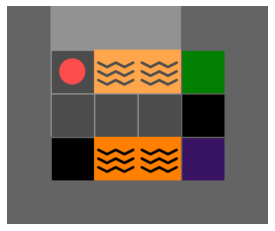

/Users/nicholasrenninger/Google Drive/Grad School/specification learning/code/DPFA_DTS_product_experiment/dfasatInvestigations/wombats/systems/minigrid.py:717: RuntimeWarning: could not find any goal objects.
  warnings.warn(msg, RuntimeWarning)


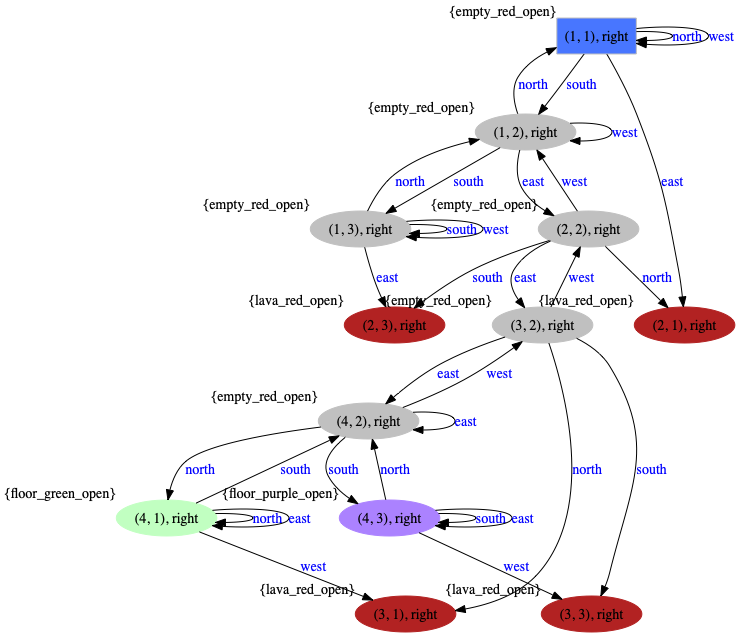

In [36]:
env = gym.make(ENV_ID)
env = StaticMinigridTSWrapper(env, actions_type='simple_static',
                              monitor_log_location=GYM_MONITOR_LOG_DIR)
env.reset()
env.render_notebook()

minigrid_TS = active_automata.get(automaton_type='TS', graph_data=env,
                                  graph_data_format='minigrid')
minigrid_TS.draw('_'.join([EXPERIMENT_NAME, ENV_ID, 'TS']))

In [37]:
minigrid_TS.observations

{'empty_red_open', 'floor_green_open', 'floor_purple_open', 'lava_red_open'}

In [38]:
list(minigrid_TS.actions)

[<SimpleStaticActions.north: 0>,
 <SimpleStaticActions.south: 1>,
 <SimpleStaticActions.east: 2>,
 <SimpleStaticActions.west: 3>]

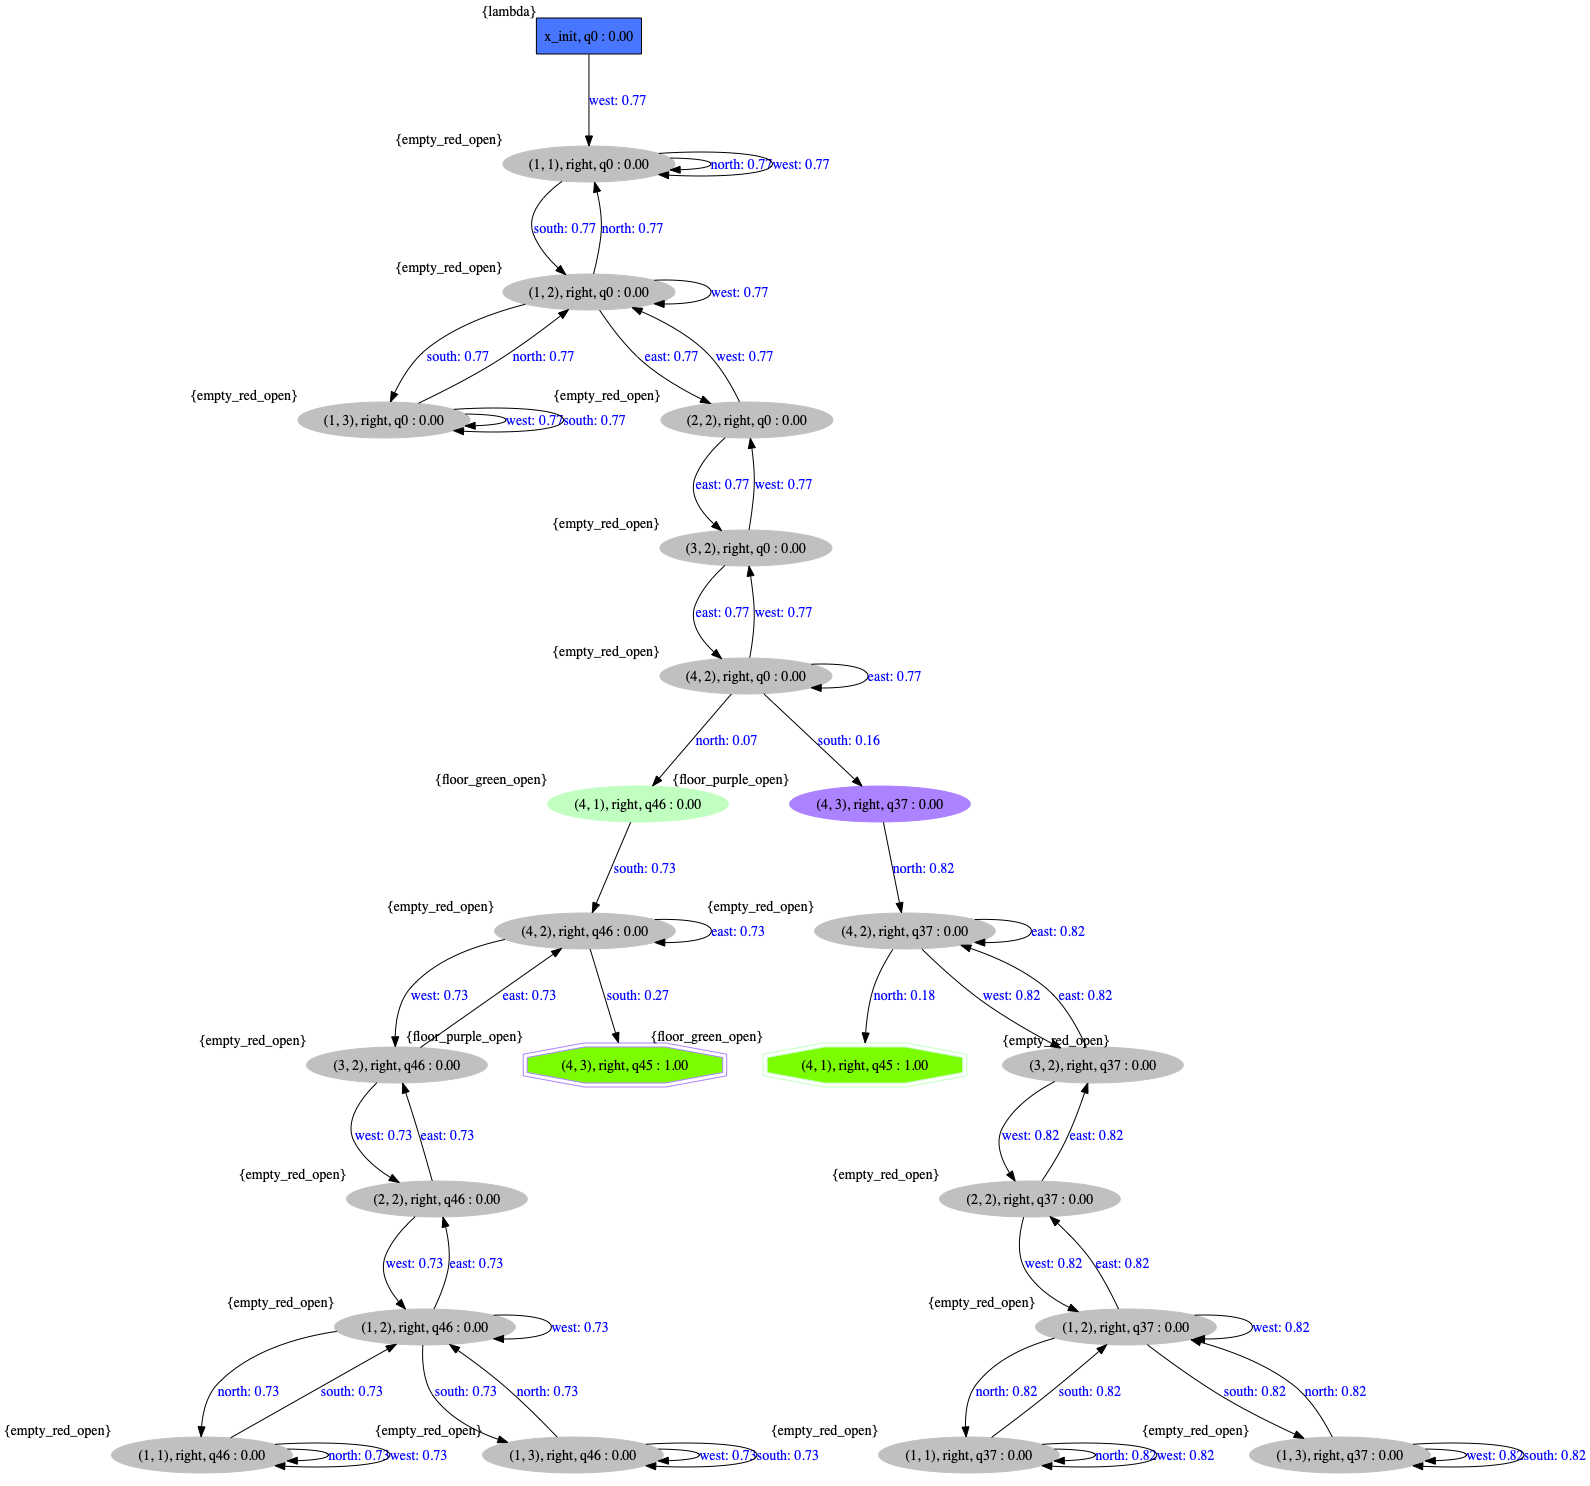

In [39]:
product = active_automata.get(automaton_type='Product',
                              graph_data=(minigrid_TS,
                                          learned_pdfa),
                             show_steps=False)
product.draw('_'.join([EXPERIMENT_NAME, ENV_ID, 'learned', 'product']))

In [40]:
product.observations

{'empty_red_open', 'floor_green_open', 'floor_purple_open', 'lambda'}

In [41]:
(controls,
 prob_of_controls_under_spec) = product.compute_strategy()

print(f'Optimal Controls: {controls}')
print(f'Probability of Generated TS Observations in Spec: ' +
      f'{prob_of_controls_under_spec}')


Optimal Controls: ['south', 'east', 'east', 'east', 'south', 'north', 'north']
Probability of Generated TS Observations in Spec: 0.006382279365069508


In [42]:
output_string, visited_states, video_path = minigrid_TS.run(controls,
                                                            record_video=True)
print(output_string)
print(visited_states)
Video(video_path, embed=True, html_attributes="controls muted autoplay loop")

['empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'empty_red_open', 'floor_purple_open', 'empty_red_open', 'floor_green_open']
['(1, 1), right', '(1, 2), right', '(2, 2), right', '(3, 2), right', '(4, 2), right', '(4, 3), right', '(4, 2), right', '(4, 1), right']
